### Setup

In [1]:
# magic reload
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')
from analysis.analysis_utils import *
from analysis.plot_utils import *
from datasets import load_dataset
all_df = prepare_df()

In [2]:
all_df = prepare_df()

In [3]:
mmlu_dataset = load_dataset('TIGER-Lab/MMLU-Pro')['test']

mmlu_df = all_df[all_df['config_dataset_name_debates'] == 'TIGER-Lab/MMLU-Pro'].copy()
category_map = {}
for idx in range(len(mmlu_dataset)):
    category_map[idx] = mmlu_dataset[idx].get('category', None)
mmlu_df['category'] = mmlu_df['question_idx_debates'].map(category_map)

(<module 'matplotlib.pyplot' from '/Users/joshlevy/.pyenv/versions/3.11.13/envs/llm_judge_debate_NEW_env/lib/python3.11/site-packages/matplotlib/pyplot.py'>,
 <Axes: xlabel='Judge Model', ylabel='Gain'>,
 <Axes: xlabel='Judge Model', ylabel='Gap'>)

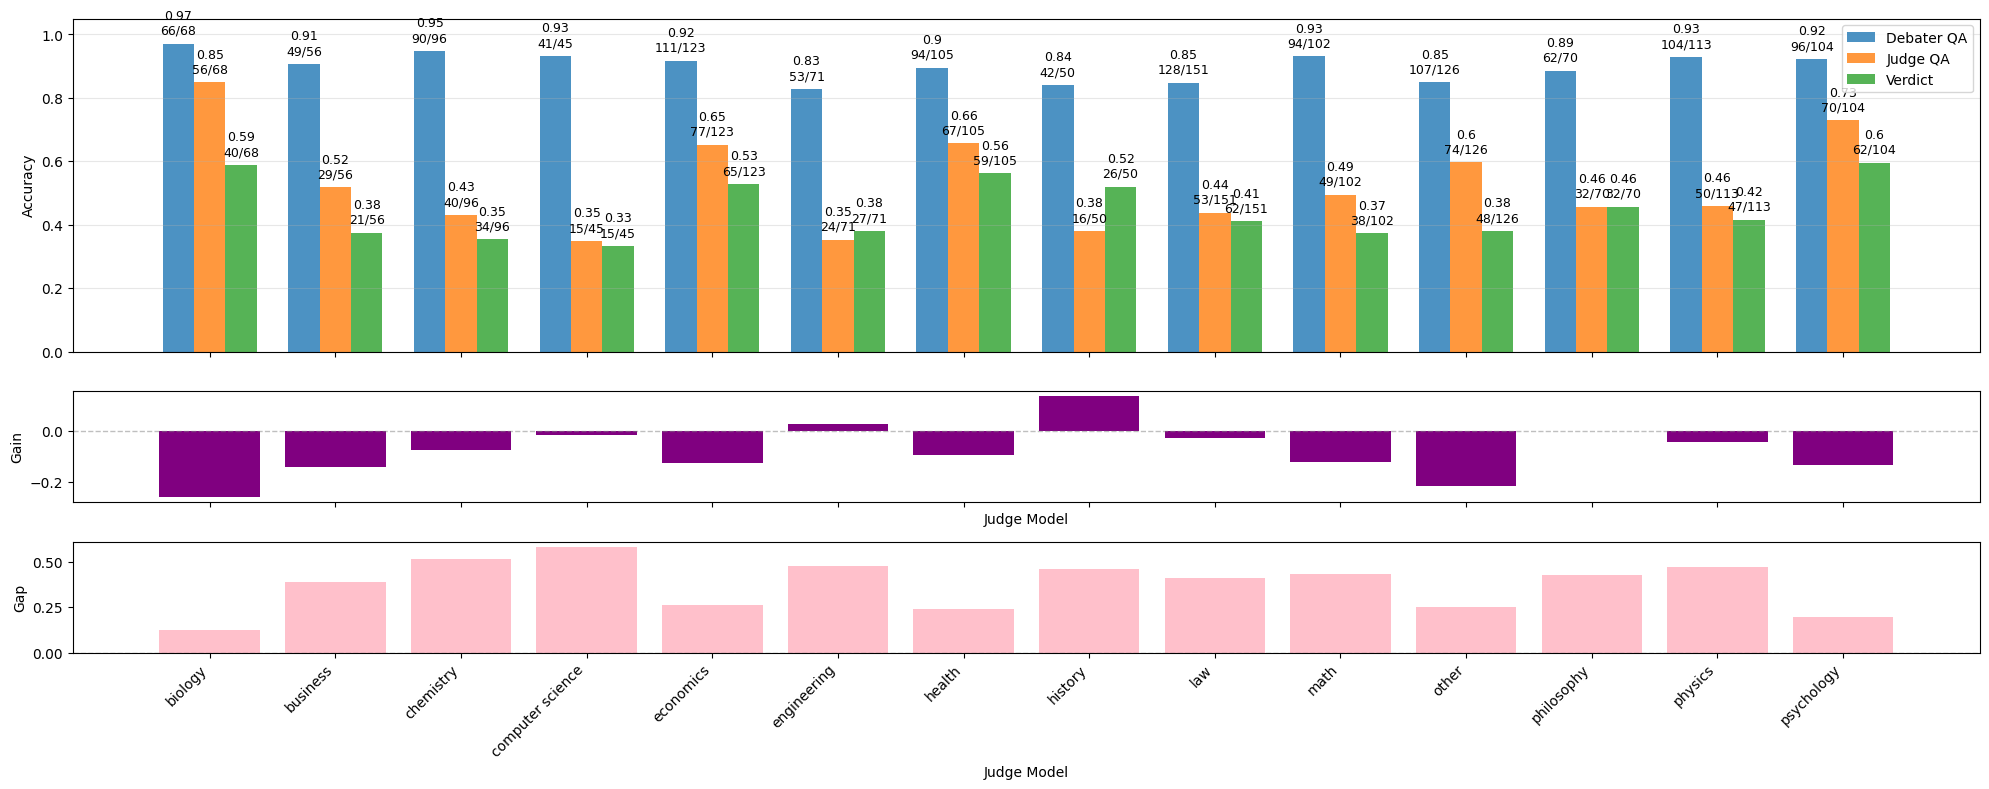

In [4]:
# mmlu_verdict_run_ids = ['4nay3cp', '07e1puy', 'ntxteqy', '9amuk8w']
verdict_run_id = '4nay3cp'

acc_df = aggregate_by_fields(mmlu_df[mmlu_df['verdict_run_id_verdicts'] == verdict_run_id], ['category'])

plot_results_by_name(acc_df, field='category')

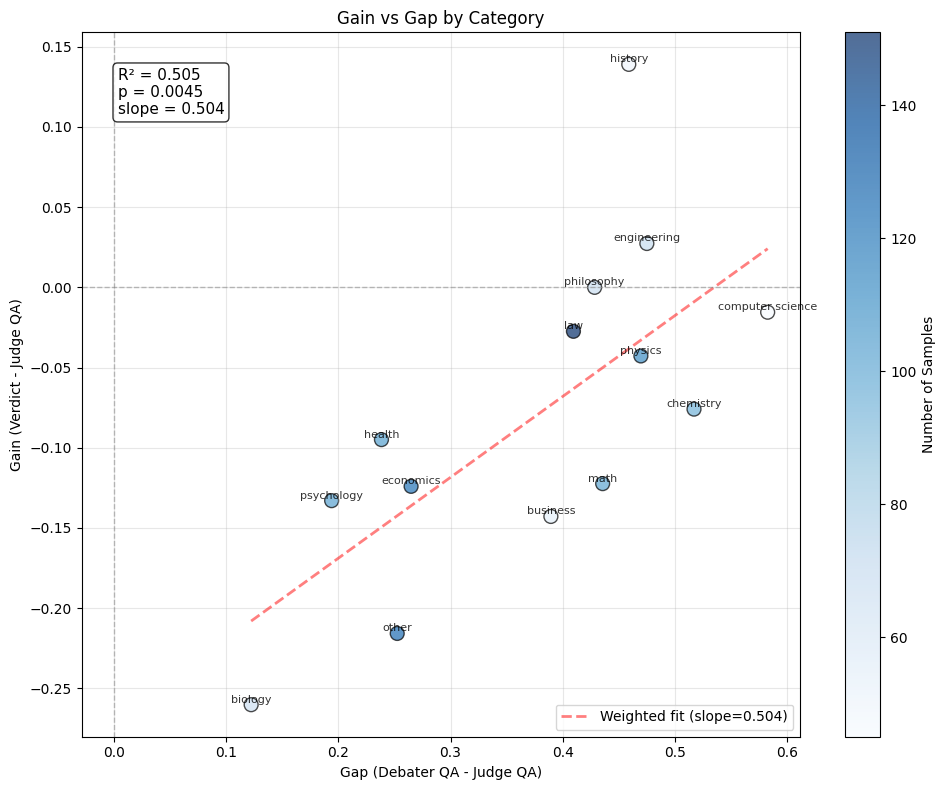

In [5]:
plot_gain_over_gap(acc_df, xfield='gap', yfield='gain')